<a href="https://colab.research.google.com/github/EmmanuelABonsu/machine_learning/blob/main/src/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing Libraries and modules
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler,OneHotEncoder,RobustScaler
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingRegressor
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer
from sklearn.compose import TransformedTargetRegressor
from scipy import stats

In [3]:
# Reading in data 
training_data = pd.read_csv('https://raw.githubusercontent.com/EmmanuelABonsu/machine_learning/main/data/regression_data/training.csv')
training_data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,11.85,-258.09,-6.95,2557.29,Low,Europe,7.59,-28.22,-259.22,-1578.12,-141.76,9,6,20.19,169.26,1.64,999.41
1,11.99,-169.71,-16.06,2862.87,Low,Rest,2.57,-13.76,-321.80,-1914.16,-165.83,6,6,9.51,6259.05,0.08,0.00
2,3.48,-317.76,-8.14,2175.81,Medium,UK,1.60,-32.76,-253.54,457.12,-203.87,15,10,7.02,38504.82,6.40,266.29
3,14.75,-394.26,-5.61,1927.86,Low,UK,7.33,-13.42,-149.86,-1972.04,-145.52,6,10,33.99,20883.90,21.98,598.77
4,10.25,-365.46,-10.33,3187.98,High,USA,4.37,-32.66,-224.58,-2022.36,-153.94,12,10,4.29,12095.91,2167.48,396.90


## Exploratory Data Analysis
In this section,I explore the given to training data and perform the necessary data cleaning. These steps include:
1. Inspecting the features for missing values

2. Inspecting the data type of each each feature

3. Obtaining the statistical distribution of the data

4. Inspecting the distribution of the of target values

5. Creating a correlation matrix between the features and class labels

6. Replacing categorical features with numrical values using OneHotEncoding

7. Splitting the data set with 80-20 split for training and validation

In [4]:
# Check missing values in each column 
training_data.isnull().sum()

F1        0
F2        0
F3        0
F4        0
F5        0
F6        0
F7        0
F8        0
F9        0
F10       0
F11       0
F12       0
F13       0
F14       0
F15       0
F16       0
Target    0
dtype: int64

In [5]:
# Inspecting data types of each column
training_data.dtypes

F1        float64
F2        float64
F3        float64
F4        float64
F5         object
F6         object
F7        float64
F8        float64
F9        float64
F10       float64
F11       float64
F12         int64
F13         int64
F14       float64
F15       float64
F16       float64
Target    float64
dtype: object

In [6]:
# Chacking Basic Statistics on data 
training_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
F1,1500.0,10.757127,3.024250,1.33,8.6400,10.760,12.8800,19.78
F2,1500.0,-336.287880,87.920436,-643.65,-394.3800,-333.870,-277.3500,-67.23
F3,1500.0,-7.285153,3.040026,-16.99,-9.2650,-7.390,-5.3300,2.78
F4,1500.0,2671.684440,889.404292,-310.65,2063.7975,2663.205,3286.7025,5864.37
F7,1500.0,4.054593,2.906426,0.04,1.9075,3.370,5.4725,22.57
F8,1500.0,-19.753333,8.366284,-52.26,-23.7100,-19.790,-15.9700,35.48
F9,1500.0,-213.443933,59.715228,-450.88,-253.5400,-213.350,-171.7100,-3.00
F10,1500.0,-1334.077107,602.841367,-3435.84,-1752.2250,-1326.910,-932.3800,718.02
F11,1500.0,-158.306867,42.241393,-348.81,-179.3800,-158.245,-138.3075,122.66
F12,1500.0,11.842000,5.510107,0.00,9.0000,12.000,15.0000,33.00


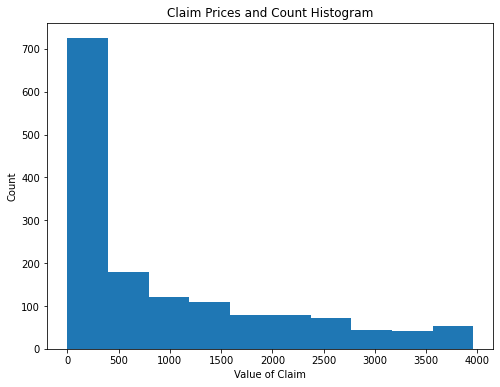

In [7]:
# Plotting Distribution of Target Values
plt.figure(figsize=(8, 6));
plt.hist(training_data['Target']);
plt.title('Claim Prices and Count Histogram');
plt.xlabel('Value of Claim');
plt.ylabel('Count');
plt.show();

In [8]:
# training_data = np.log1p(training_data[])
# training_data.head()

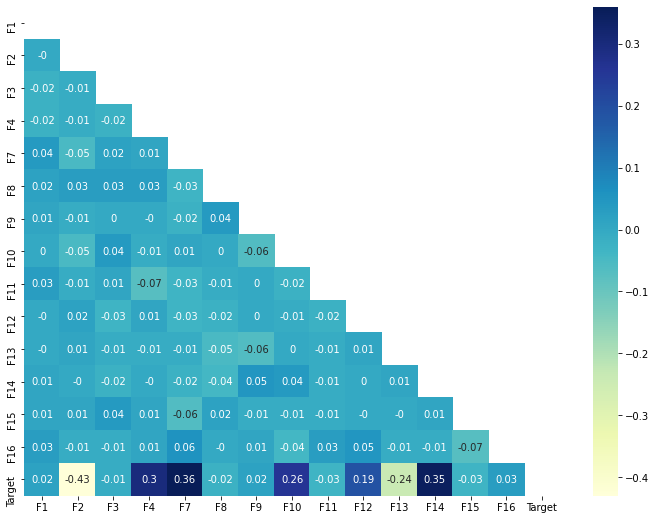

In [9]:
# Correlation Map of Features and Target Value
plt.figure(figsize=(12, 9))
correlation_matrix = training_data.corr().round(2)
zero_mask = np.zeros_like(correlation_matrix, dtype = np.bool)
zero_mask[np.triu_indices_from(zero_mask)] = True
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True, mask = zero_mask)

In [10]:
# OneHotEncoding Categorical Values
numeric_features = ['F1','F2','F2','F3','F4','F7','F8','F8','F10','F11','F12','F13','F14','F15', 'F16']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = ['F5', 'F6']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, numeric_features),
                  ('cat', categorical_transformer, categorical_features)])

In [11]:
# Defining the input and target sets
X = training_data.drop('Target', axis = 1)
y = training_data['Target']

In [12]:
# Spliting data into training and validation set 
train_x, validate_x, train_y, validate_y = train_test_split(X, y,test_size=0.20, shuffle=True)

In [13]:
model_train_result = []
model_validation_result = []

## Comparative study with Linear Regression, SVR, Decision Tree and K-NN
In this part I undertake the comparative evaluation of four models: Linear Regressor, Support Vector Regressor, Decision Tree Regressor and K-NN Regressor. For each regressor, I perform the following steps:
1. Create a pipeline that specicifies the preprocessing steps(i.e replacing categorical values), type of scaler and the type of regressor to be used
2. Define parameter grid of hyperparameters needed to optimized for the given regressor
3. Perform a gridsearch with the pipeline and parameter grid to determine the best model 
4. Perform a fivefold cross validation with the best model
5. Fit the best model with the training data set
6. Evaluate model accuracy with the validation set 
7. Plot a scatter plot of the validation set as well as bar chart representation of the target values and the predicted value

In [14]:
# Comparative study with Linear Regression
pipe_lr = Pipeline(steps= [('preprocessor', preprocessor),
                           ('sc', StandardScaler()), 
                           ('linearregression',linear_model.LinearRegression())])
param_lr = {'linearregression__fit_intercept': [True, False],
            'linearregression__normalize': [True, False]
}
gs_lr = GridSearchCV(pipe_lr, param_lr, n_jobs=-1, cv = 5)
cv_lr = cross_val_score(gs_lr, train_x, train_y, cv=5, scoring='r2')
gs_lr.fit(train_x, train_y)
# Inspecting Accuracy of Model
print("Accuracy score on training data",gs_lr.score(train_x,train_y))
print("Accuracy score on validation data",gs_lr.score(validate_x,validate_y))
print("Best parameter (CV score=%0.5f):" % gs_lr.best_score_)
print("Best parameters fitted to the model",gs_lr.best_params_)
model_train_result.append(cv_lr)

Accuracy score on training data 0.7872574504354987
Accuracy score on validation data 0.7942963633626737
Best parameter (CV score=0.77861):
Best parameters fitted to the model {'linearregression__fit_intercept': True, 'linearregression__normalize': False}


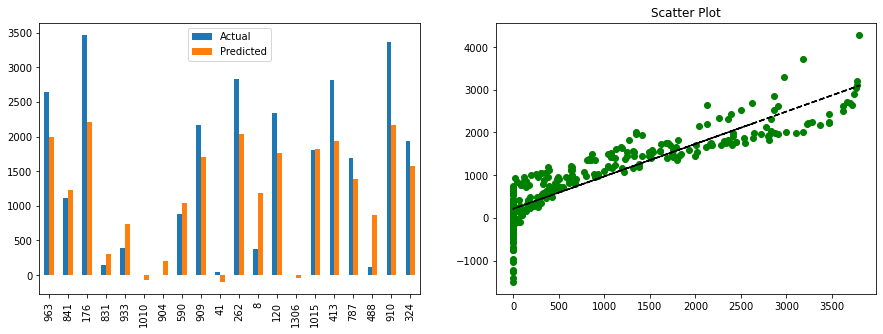

In [15]:
# Comparing Predicted value to actual value for Linear Regression model with plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
plt.scatter(validate_y, gs_lr.predict(validate_x),color='g')
m, b = np.polyfit(validate_y, gs_lr.predict(validate_x), 1)
plt.plot(validate_y, m*validate_y + b, '--k')
plt.title('Scatter Plot')

y_pred_lr = gs_lr.predict(validate_x)
df_lr = pd.DataFrame({'Actual': validate_y, 'Predicted': y_pred_lr})
df2_lr = df_lr.head(20)
df2_lr.plot(ax= axes[0],kind='bar')

In [16]:
# Comparative study with Support Vector Regressor (SVR) 
pipe_svr = Pipeline(steps=[('preprocessor', preprocessor),
                           ('sc', StandardScaler()), 
                           ('svr', SVR())])
param_svr = {'svr__gamma': np.logspace(-3, 3, 5),
             'svr__C': [1, 10, 100, 1000],
            'svr__kernel': ['linear','rbf', 'sigmoid']
            }
gs_svr = GridSearchCV(pipe_svr, param_svr, n_jobs=-1, cv = 5)
cv_svr = cross_val_score(gs_svr, train_x, train_y, cv=5, scoring='r2')
gs_svr.fit(train_x, train_y)
# Inspecting Accuracy of Model
print("Accuracy score on training data", gs_svr.score(train_x,train_y))
print("Accuracy score on validation data",gs_svr.score(validate_x,validate_y))
print("Best parameter (CV score=%0.5f):" % gs_svr.best_score_)
print("Best parameters fitted to the model",gs_svr.best_params_)
model_train_result.append(cv_svr)


Accuracy score on training data 0.9526614221070512
Accuracy score on validation data 0.892341564614286
Best parameter (CV score=0.88610):
Best parameters fitted to the model {'svr__C': 1000, 'svr__gamma': 0.03162277660168379, 'svr__kernel': 'rbf'}


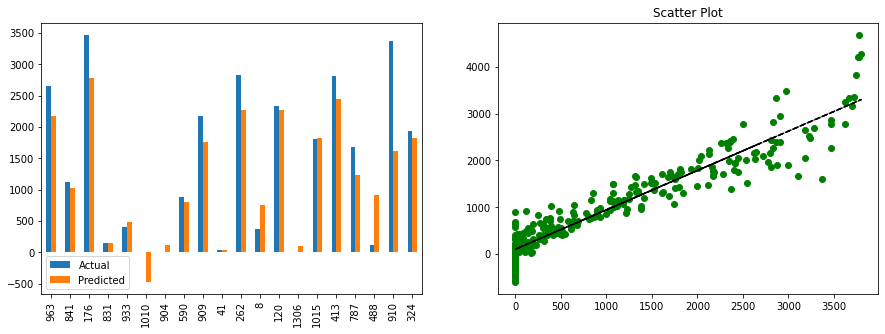

In [17]:
# Comparing actual values to Model's predicted values 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
plt.scatter(validate_y, gs_svr.predict(validate_x),color='g')
m, b = np.polyfit(validate_y, gs_svr.predict(validate_x), 1)
plt.plot(validate_y, m*validate_y + b, '--k')
plt.title('Scatter Plot')

y_pred_svr = gs_svr.predict(validate_x)
df_svr = pd.DataFrame({'Actual': validate_y, 'Predicted': y_pred_svr})
df2_svr = df_svr.head(20)
df2_svr.plot(ax=axes[0],kind='bar')

In [18]:
# Comparative Study with Decision Tree Regressor
pipe_dtr = Pipeline(steps=[('preprocessor', preprocessor),
                           ('sc', StandardScaler()), 
                           ('dec_tree', DecisionTreeRegressor())])
param_dtr = {'dec_tree__max_depth':[2,4,6,8,10,12]}
dt_regressor= GridSearchCV(pipe_dtr, param_dtr, n_jobs=-1,cv=5)
dt_regressor.fit(train_x,train_y)
cv_dtr = cross_val_score(dt_regressor, train_x, train_y, cv=5, scoring='r2')
print("Accuracy score on training data",dt_regressor.score(train_x,train_y))
print("Accuracy score on validation data",dt_regressor.score(validate_x,validate_y))
print("Best parameter (CV score=%0.5f):" % dt_regressor.best_score_)
print("Best parameters fitted to the model",dt_regressor.best_params_)
model_train_result.append(cv_dtr)


Accuracy score on training data 0.7269309696749706
Accuracy score on validation data 0.18830876654497763
Best parameter (CV score=0.33663):
Best parameters fitted to the model {'dec_tree__max_depth': 6}


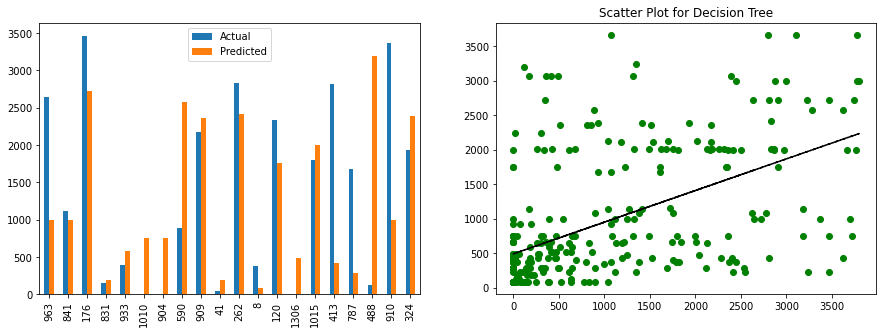

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
plt.scatter(validate_y, dt_regressor.predict(validate_x),color='g')
m, b = np.polyfit(validate_y, dt_regressor.predict(validate_x), 1)
plt.plot(validate_y, m*validate_y + b, '--k')
plt.title('Scatter Plot for Decision Tree')

y_pred_dtr = dt_regressor.predict(validate_x)
df_dtr = pd.DataFrame({'Actual': validate_y, 'Predicted': y_pred_dtr})
df2_dtr = df_dtr.head(20)
df2_dtr.plot(ax=axes[0],kind='bar')

In [20]:
# Comparative study with k-nn Regressor
pipe_knn = Pipeline([('preprocessor', preprocessor),
                     ('sc', StandardScaler()),
                     ('regressor', KNeighborsRegressor())])
param_knn = {'regressor__n_neighbors': list(range(1,21))}
knn_regressor = GridSearchCV(pipe_knn, param_knn, cv=5)
knn_regressor.fit(train_x, train_y)
cv_knn = cross_val_score(pipe_knn, train_x, train_y, cv=5, scoring='r2')
# Inspecting accuracy of model
print("Accuracy score on training data",knn_regressor.score(train_x,train_y))
print("Accuracy score on validation data",knn_regressor.score(validate_x,validate_y))
print("Best parameter (CV score=%0.5f):" % knn_regressor.best_score_)
print("Best parameters fitted to the model",knn_regressor.best_params_)
model_train_result.append(cv_knn)


Accuracy score on training data 0.6487199566515782
Accuracy score on validation data 0.5629322870093243
Best parameter (CV score=0.54611):
Best parameters fitted to the model {'regressor__n_neighbors': 10}


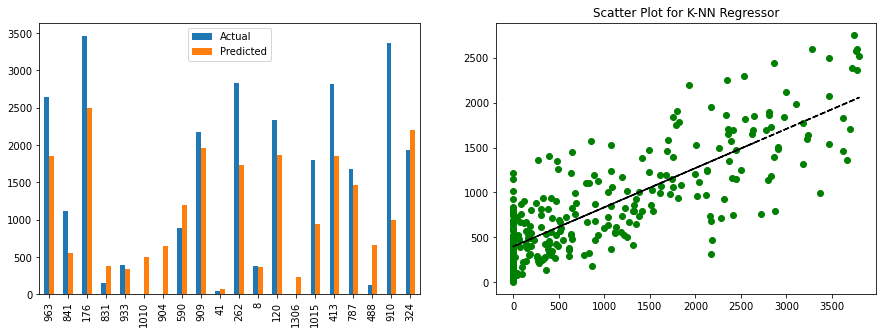

In [21]:
# Comparing actual target values with model's predicted value
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
plt.scatter(validate_y, knn_regressor.predict(validate_x),color='g')
m, b = np.polyfit(validate_y, knn_regressor.predict(validate_x), 1)
plt.plot(validate_y, m*validate_y + b, '--k')
plt.title('Scatter Plot for K-NN Regressor')
# Inspecting accuracy of model
y_pred_knn = knn_regressor.predict(validate_x)
df_knn = pd.DataFrame({'Actual': validate_y, 'Predicted': y_pred_knn})
df2_knn = df_knn.head(20)
df2_knn.plot(ax=axes[0],kind='bar')

## Selecting the Best Model 
For this section, I generated the box and whiskers plot of the average validation accuracies of each model. The model with the highest accuracy was picked as the best one for final prediction

[array([0.78167801, 0.77906666, 0.80064579, 0.76218318, 0.76336261]), array([0.88082835, 0.88289599, 0.88615576, 0.88457964, 0.89603447]), array([0.25951707, 0.40140663, 0.36085117, 0.19804287, 0.33955315]), array([0.55105545, 0.54627741, 0.53960742, 0.56529237, 0.51135033])]


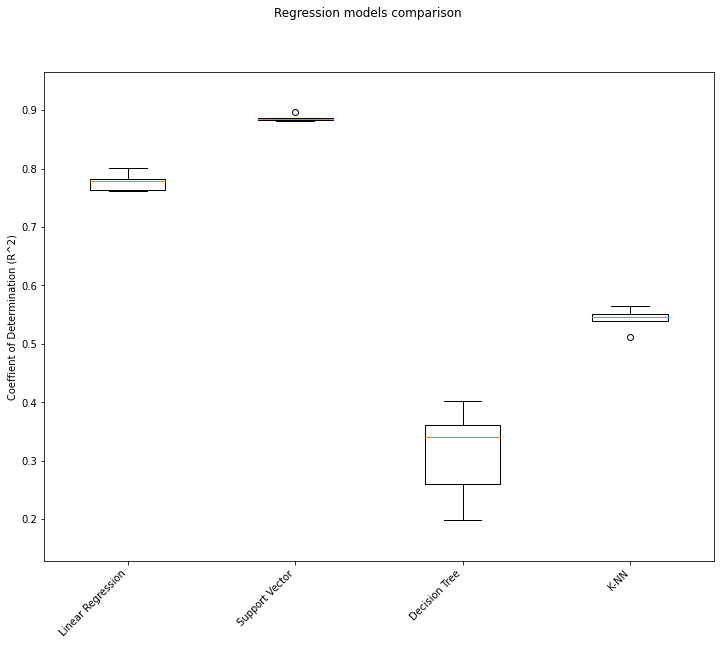

In [22]:
# Plotting Box and Whiskers graph to compare model perfomances
model_names = ['Linear Regression', 'Support Vector', 'Decision Tree', 'K-NN']
print(model_train_result)
figure = plt.figure(figsize=(12, 9));
figure.suptitle('Regression models comparison');
ax = figure.add_subplot(111);
plt.boxplot(model_train_result);
ax.set_xticklabels(model_names, rotation = 45, ha="right");
ax.set_ylabel("Coeffient of Determination (R^2)");
plt.margins(0.05, 0.1);
#plt.savefig("model_mse_scores.png")
plt.show();

## Making Prediction with the Best Model Selected

In [23]:
# Reading in testing data
test_data_original = pd.read_csv('https://raw.githubusercontent.com/EmmanuelABonsu/machine_learning/main/data/regression_data/test.csv')
test_data = test_data_original.copy() 
test_data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,11.23,-195.54,-1.19,1468.56,Very high,USA,8.97,-23.62,-249.36,-854.18,-155.20,12,10,12.39,-3480.87,0.04,NaN
1,14.89,-426.24,-1.18,3049.08,Very high,USA,6.33,-39.26,-226.26,-2126.68,-159.42,9,8,5.19,8831.19,43.68,NaN
2,6.76,-493.47,-13.55,3197.13,Very low,USA,1.77,-25.84,-238.30,-2270.78,-212.73,12,10,3.30,-4468.44,0.52,NaN
3,15.12,-320.04,-12.17,2436.00,Very low,Rest,5.42,-17.32,-203.64,-304.24,-100.34,18,12,6.51,22851.60,758.54,NaN
4,10.12,-387.99,-7.11,2800.89,Very low,Europe,1.39,-12.78,-265.16,-1419.76,-137.49,0,14,14.22,24396.09,0.68,NaN


In [24]:
# Making Prediction with SVR
test_data_without_target = test_data.drop('Target', axis=1)
test_data_without_target.head(10)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16
0,11.23,-195.54,-1.19,1468.56,Very high,USA,8.97,-23.62,-249.36,-854.18,-155.20,12,10,12.39,-3480.87,0.04
1,14.89,-426.24,-1.18,3049.08,Very high,USA,6.33,-39.26,-226.26,-2126.68,-159.42,9,8,5.19,8831.19,43.68
2,6.76,-493.47,-13.55,3197.13,Very low,USA,1.77,-25.84,-238.30,-2270.78,-212.73,12,10,3.30,-4468.44,0.52
3,15.12,-320.04,-12.17,2436.00,Very low,Rest,5.42,-17.32,-203.64,-304.24,-100.34,18,12,6.51,22851.60,758.54
4,10.12,-387.99,-7.11,2800.89,Very low,Europe,1.39,-12.78,-265.16,-1419.76,-137.49,0,14,14.22,24396.09,0.68
5,12.04,-238.83,-10.26,3570.12,Very high,USA,6.03,-19.64,-192.82,-2083.90,-146.19,12,10,13.80,3552.57,23.34
6,13.67,-166.41,-5.10,1781.91,High,Rest,1.60,-29.18,-101.34,-492.38,-194.68,12,6,12.93,7142.04,0.02
7,6.94,-221.73,-5.49,2853.51,Medium,UK,9.24,-18.92,-274.56,-1583.56,-114.48,9,10,9.54,35520.24,775.90
8,8.42,-243.96,-11.00,2101.41,High,UK,7.90,-18.76,-192.14,-1070.52,-25.32,6,12,5.55,6417.63,0.18
9,10.95,-507.63,-12.12,3345.48,Very high,USA,8.08,-20.08,-266.32,-1312.92,-164.27,9,12,15.33,1676.01,2.22


In [25]:
test_predictions = gs_svr.predict(test_data_without_target)
test_data_original.loc[:, 'Target'] = test_predictions
test_data_original.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,11.23,-195.54,-1.19,1468.56,Very high,USA,8.97,-23.62,-249.36,-854.18,-155.20,12,10,12.39,-3480.87,0.04,1074.170777
1,14.89,-426.24,-1.18,3049.08,Very high,USA,6.33,-39.26,-226.26,-2126.68,-159.42,9,8,5.19,8831.19,43.68,1482.710910
2,6.76,-493.47,-13.55,3197.13,Very low,USA,1.77,-25.84,-238.30,-2270.78,-212.73,12,10,3.30,-4468.44,0.52,595.900228
3,15.12,-320.04,-12.17,2436.00,Very low,Rest,5.42,-17.32,-203.64,-304.24,-100.34,18,12,6.51,22851.60,758.54,495.637499
4,10.12,-387.99,-7.11,2800.89,Very low,Europe,1.39,-12.78,-265.16,-1419.76,-137.49,0,14,14.22,24396.09,0.68,-375.290873
